# Predicting survival on the Titanic

In dit werkstuk ...

We gerbuiken informatie van [deze website](http://www.encyclopedia-titanica.org).


## Inleiding


## voorbereiding


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Het avontuur begint met het importeren van de nodige packages. De dataset is van de [kaggle site](https://www.kaggle.com/c/titanic/data) gedownload als csv_file en is vervolgens ingelezen door pandas als dataframe.

In [8]:
data = pd.read_csv('titanic.csv')

Het 'hoofd' van de dataframe met alle columns en rijen. Dit roept al een aantal vragen. Welke variabelen spelen een mogelijke rol bij het bepalen van de overlevingskansen? Geslacht en andere variabelen zijn geen numerieke waarden, hoe moet dit worden omgezet? 

## Eerste blik op de data

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Alle gegevens over het dataframe zoals het gemiddelde, standaarddeviatie en kwartielen

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Zoeken in de dataset naar bijvoorbeeld mensen die 80 jaar oud waren. Er wordt 1 passagier gevonden

In [5]:
data[data.Age == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


## eerste grafieken

Om een goede indruk te krijgen van de dataset en de invloeden van variabelen op elkaar, worden er een aantal grafieken gemaakt met matplotlib.

Text(0,0.5,'Survived')

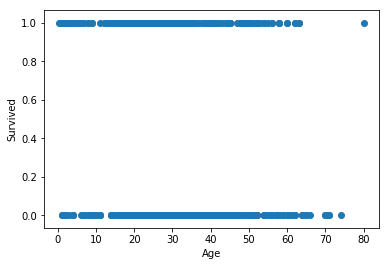

In [126]:
plt.scatter(data.Age,data.Survived)
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0,0.5,'Fare')

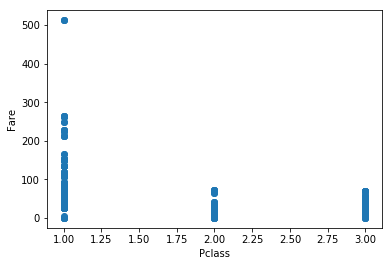

In [127]:
plt.scatter(data.Pclass,data.Fare)
plt.xlabel('Pclass')
plt.ylabel('Fare')

Ik heb ontdekt dat scatterplots niet altijd even handig zijn om bepaalde variabelen in weer te geven. Er is niet zoveel te zien over de spreiding omdat alle punten nogal dicht op elkaar zitten. Er valt wel op dat iemand die eerste klas heeft gereisd hier heel veel voor heeft betaald. 

Text(0,0.5,'Surved')

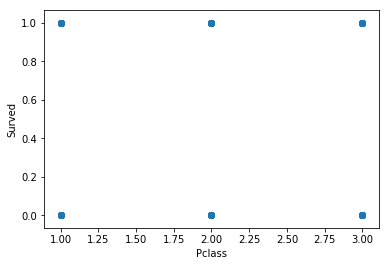

In [128]:
plt.scatter(data.Pclass, data.Survived)
plt.xlabel('Pclass')
plt.ylabel('Surved')

Text(0,0.5,'Survived')

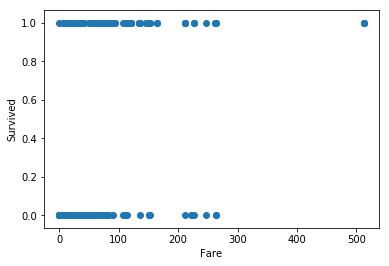

In [129]:
plt.scatter(data.Fare, data.Survived)
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0,0.5,'Age')

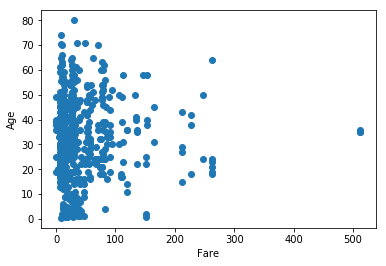

In [130]:
plt.scatter(data.Fare, data.Age)
plt.xlabel('Fare')
plt.ylabel('Age')

In [14]:
data[data.Fare > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Op zoek naar de passagiers die meer dan 400 hebben betaald voor hun reis

In [15]:
print(data.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
type(data.Fare)

pandas.core.series.Series

In [73]:
df_cleaned = data.dropna()
df_cleaned['male_dummy'] = (df_cleaned.Sex == 'male') #nieuwe kolom definiëren om male te veranderen in een boolean
X = df_cleaned[['Age','male_dummy', 'Pclass', 'SibSp', 'Fare']]
y = df_cleaned[['Survived']]


/Users/myrthe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Hier worden de eerste aanpassingen gedaan aan de dataset. Alle rijen waarin gegevens missen worden verwijderd uit de dataset door gebruik te maken van het commando .dropna(). Dit betekent drop alle NaN (Not a Number). Vervolgens is het probleem van het geslacht opgelost. Door er een dummy van te maken wordt het verschil in geslacht nu aangeduid met een boolean. Een vrouw is 'False' en een  man 'True'. Vervolgens zijn er onder de naam X een aantal variabelen ingevoerd die makkelijk getest kunnen worden omdat het allemaal numerieke waarden zijn zoals de leeftijd, de klas en de ticketprijs bijvoorbeeld.

In [74]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_dummy
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False


Hier is de nieuwe kolom te zien waarin het geslacht is veranderd in een boolean.

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)

/Users/myrthe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hier wordt de eerste regressor ingezet en gefit op de dataset. Er wordt nu nog niet gesplitst in train en testset. Alleen fit en predict om een indicatie te krijgen hoe dit werkt en wat voor waarden er dan uitkomen.

In [76]:
logreg.coef_

array([[-0.01636209, -2.08109476,  0.01318695,  0.2035389 ,  0.00296447]])

In [ ]:
# Classification report met y_test en y_pred

In [ ]:
# Scaling?

In [ ]:
# Waar kan ik zien hoe goed mijn model performed?

In [ ]:
# steps?

In [55]:
X.head()

,Age,male_dummy
1,38.0,False
3,35.0,False
6,54.0,True
10,4.0,False
11,58.0,False


In [45]:
P = df_cleaned[['Pclass', 'Fare','Age','male_dummy']]

In [57]:
P.head()

,Pclass,Fare,Age,male_dummy
1,1,71.2833,38.0,False
3,1,53.1000,35.0,False
6,1,51.8625,54.0,True
10,3,16.7000,4.0,False
11,1,26.5500,58.0,False


## grafische illustratie van een voorspelling

2 variables

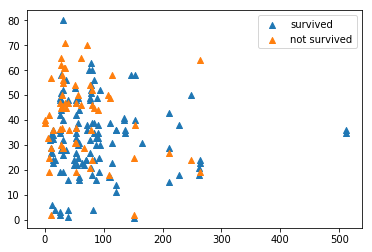

In [123]:
survived = df_cleaned[df_cleaned.Survived == 1]
not_survived = df_cleaned[df_cleaned.Survived == 0]

plt.scatter(survived.Fare, survived.Age, marker='^', label = 'survived')
plt.scatter(not_survived.Fare, not_survived.Age, marker='^', label = 'not survived')
plt.legend()

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(P, y)
y_pred = logreg.predict(P)

/Users/myrthe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
logreg.coef_

array([[ 0.00917324,  0.00337838, -0.01693475, -2.07643966]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=6)

In [58]:
knn.fit(P,y)

/Users/myrthe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [59]:
prediction = knn.predict(P)

In [60]:
P.shape

(183, 4)

In [61]:
print('Prediction{}'.format(prediction))

Prediction[1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1]


Als mijn leeftijd toeneemt, en class, fare en geslacht constant blijven, kan je de coëfficient interpreteren als: 
hoe hoger je leeftijd, hoe lager je overlevingskans.

Esc, m voor markdown, enter

Woord typen + tab completion

Alleen geslacht en leeftijd, hou je geen rekening met de andere variabelen die een effect kunnen hebben op geslacht en leeftijd. Bijv. oudere mensen kopen vaker een duurder ticket. 

Overfitting = je begint dingen te generaliseren die gelden voor het sample dat je voor je neus hebt (knn=1), je kan geen conclusie trekken over de gehele set. 

Underfitting = je gebruikt te weinig variabelen, je generaliseert juist te veel. Je probeert alles te verklaren uit geslacht bijvoorbeeld. Maar je hebt ook andere variabelen. (alleen pclass of alleen geslacht kiezen)

Bij underfitting is je score heel laag

In [62]:
knn.score(P,y)

0.7486338797814208

Linear decision boundary maken van de 183 gegevens die ik heb, dan een train_test_split enzo maken, dan weer een linear decision boundary maken en dan kijken of de plaatjes overeenkomen. 

Embarked, cabin? 

In [78]:
logreg = LogisticRegression()

Hoe vaak komt familienaam voor? 

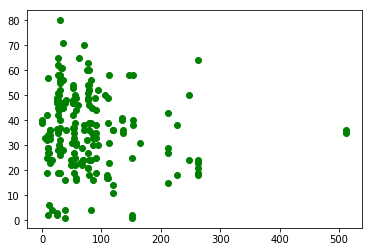

In [79]:
plt.scatter(df_cleaned.Fare, df_cleaned.Age, c='G')

In [90]:
P.head()

,Pclass,Fare,Age,male_dummy
1,1,71.2833,38.0,False
3,1,53.1000,35.0,False
6,1,51.8625,54.0,True
10,3,16.7000,4.0,False
11,1,26.5500,58.0,False


In [93]:
q = df_cleaned.Survived

In [94]:
q.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn.model_selection import train_test_split

In [103]:
logreg = LogisticRegression()
P_train, P_test, q_train, q_test = train_test_split(P,q, test_size=0.2, random_state=42)
logreg.fit(P_train, q_train)
q_pred = logreg.predict(P_test)

In [104]:
print('Prediction {}'.format(q_pred))

Prediction [1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1]


In [105]:
P_train.head()

,Pclass,Fare,Age,male_dummy
331,1,28.5000,45.5,True
336,1,66.6000,29.0,True
193,2,26.0000,3.0,True
75,3,7.6500,25.0,True
248,1,52.5542,37.0,True


In [106]:
from sklearn.metrics import roc_auc_score
q_pred_prob = logreg.predict_proba(P_test)[:,1]
roc_auc_score(q_test, q_pred_prob)


0.8416149068322981

test_size aangepast van 0.4 naar 0.2, score neemt met meer dan 10% toe

Wat betreft de cabines, score maken waarbij de letters van de cabines cijfers krijgen. Oplopend vanaf deck E, zodat het hoogste getal bij deck A hoort. Hiervan wordt verwacht dat hoe hoger het cijfer, hoe groter de overlevingskans. Deck A zat namelijk helemaal bovenaan --> makkelijkst om te ontsnappen naar een reddingsboot. Dezelfde familienamen, grotere overlevingskans? Families redden elkaar?

In [107]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, P, q, cv=5, scoring='roc_auc')
print(cv_scores)

[0.86666667 0.80333333 0.74666667 0.73263889 0.92361111]


Hyperparametertuning

Hoe zoek ik naar een specifieke naam of code in een column?

In [117]:
df_cleaned[df_cleaned.Age == 17]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male_dummy
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,False
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,True
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S,False
